In [8]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_column',999)
pd.set_option('display.max_row',999)
np.set_printoptions(threshold=5)

import ast
import re

# 1. Nettoyage des données et analyse exploratoire 
## 1.1 Nettoyage des données
### 1.1.1 Chargement des données

In [9]:
path='C:\\Users\\Catherine\\'
df_15=pd.read_csv(path+'2015-building-energy-benchmarking.csv')
df_16=pd.read_csv(path+'2016-building-energy-benchmarking.csv')

In [10]:
df_15.sample()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
3286,49893,2015,Multifamily MR (5-9),Mid-Rise Multifamily,SUNSET ELECTRIC APARTMENTS,6003500305,"{'human_address': '{""address"":""1111 E PINE ST""...",3,EAST,2014,1,7.0,97104,0,97104,"Bar/Nightclub, Multifamily Housing, Parking",Multifamily Housing,61582.0,Parking,11390.0,Bar/Nightclub,5170.0,NaN,58.0,45.0,45.0,102.2,102.2,3002337.0,3002337.0,0.0,514444.0,1755357.0,12471.0,1247053.0,0.0,78.47,0.73,No,NaN,Compliant,NaN


In [11]:
df_15.shape

(3340, 42)

In [12]:
df_16.sample()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
1200,21236,2016,NonResidential,Retail Store,PETSMART 0375 (ID21236),13000 AURORA AVE N,Seattle,WA,98133.0,1926049423,5,NORTHWEST,47.72337,-122.34373,1998,1.0,1,26115,0,26115,Retail Store,Retail Store,26115.0,NaN,NaN,NaN,NaN,NaN,43.0,64.699997,67.400002,159.800003,161.5,1689372.625,1760626.0,0.0,336562.0,1148350.0,5410.230469,541023.0,False,NaN,Compliant,NaN,36.74,1.41


In [13]:
df_16.shape

(3376, 46)

# 1.1.2 Merge des 2 échantillons de données
Les 2 datasets n'ont pas la même structure. 
On va analyser les différences afin de les concaténer. 

In [14]:
col_add_in_15=[x for x in df_15.columns if x not in df_16.columns]

col_add_in_16=[x for x in df_16.columns if x not in df_15.columns]
print(col_add_in_15,'\n',col_add_in_16)

['Location', 'OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment'] 
 ['Address', 'City', 'State', 'ZipCode', 'Latitude', 'Longitude', 'Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


In [15]:
same_col=[x for x in df_16.columns if x in df_15.columns]

# On remarque que la colonne "Location" des données de 2015 contient des données qui sont compactées. Décompacter les données afin de les récuperer dans des colonnes séparées

In [16]:
df_15['Location'] = [ast.literal_eval(str(item)) for index, item in df_15.Location.iteritems()]
df_15 = pd.concat([df_15.drop(['Location'], axis=1), df_15['Location'].apply(pd.Series)], axis=1)
df_15['human_address'] = [ast.literal_eval(str(item)) for index, item in df_15.human_address.iteritems()]
df_15 = pd.concat([df_15.drop(['human_address'], axis=1), df_15['human_address'].apply(pd.Series)], axis=1)
df_15.sample()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,latitude,needs_recoding,longitude,address,city,state,zip
56,73,2015,NonResidential,K-12 School,SEATTLE HEBREW ACADAMY,2125049015,3,EAST,1911,1,3.0,56072,0,56072,K-12 School,K-12 School,56072.0,NaN,NaN,NaN,NaN,NaN,77.0,55.4,72.3,78.7,98.6,3106930.0,4055974.0,0.0,161293.0,550355.0,25566.0,2556597.0,0.0,139.62,2.45,No,NaN,Compliant,NaN,47.63445532,False,-122.3080163,1617 INTERLAKEN DR E,SEATTLE,WA,98112


In [19]:
df_15 = df_15.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})

In [20]:
col_add_in_15=[x for x in df_15.columns if x not in df_16.columns]

col_add_in_16=[x for x in df_16.columns if x not in df_15.columns]
print(col_add_in_15,'\n',col_add_in_16)

['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', 'needs_recoding'] 
 ['Comments', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


# Les colonnes 'TotalGHGEmissions' et 'GHGEmissions(MetricTonsCO2e)' ont la même référence. Vérification de leur ordre de grandeur puis renommage.

In [21]:
print(f"Description de la variable TotalGHGEmissions 2016 : \n\n",df_16['TotalGHGEmissions'].describe(),
     f"\n\nDescription de la variable GHGEmissions(MetricTonsCO2e) 2015 : \n\n", df_15['GHGEmissions(MetricTonsCO2e)'].describe())

Description de la variable TotalGHGEmissions 2016 : 

 count     3367.000000
mean       119.723971
std        538.832227
min         -0.800000
25%          9.495000
50%         33.920000
75%         93.940000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64 

Description de la variable GHGEmissions(MetricTonsCO2e) 2015 : 

 count     3330.000000
mean       110.094102
std        409.450179
min          0.000000
25%          9.265000
50%         32.740000
75%         88.642500
max      11824.890000
Name: GHGEmissions(MetricTonsCO2e), dtype: float64


In [22]:
df_15 = df_15.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                                     'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                                     'Comment':'Comments'})
df_15.drop(['OtherFuelUse(kBtu)'], axis=1, inplace=True)

In [23]:
col_add_in_15=[x for x in df_15.columns if x not in df_16.columns]

col_add_in_16=[x for x in df_16.columns if x not in df_15.columns]
print(col_add_in_15,'\n',col_add_in_16)

['needs_recoding'] 
 []


In [24]:
# suppression de ['needs_recoding'] qui n'est pas dans df16
df_15=df_15.drop(columns=['needs_recoding'],axis=1)

In [25]:
col_add_in_15=[x for x in df_15.columns if x not in df_16.columns]

col_add_in_16=[x for x in df_16.columns if x not in df_15.columns]
print(col_add_in_15,'\n',col_add_in_16)

[] 
 []


In [26]:
# Renommage des colonnes décompactées
df_15 = df_15.rename(columns={"latitude":"Latitude", "longitude":"Longitude",
                                      "address":"Address", "city":"City", 
                                      "state":"State", "zip":"ZipCode"})

In [27]:
data = pd.concat([df_15[df_16.columns],df_16], axis = 0).sort_values(["DataYear", "OSEBuildingID"])
data.shape

(6716, 46)

In [29]:
# On ne prend que les NonResidential
print('Les types de batiments')
print(data['BuildingType'].unique())
data = data[~data['BuildingType'].str.contains("Multifamily")]
print('Batiments non résidentiels')
print(data['BuildingType'].unique())

Les types de batiments
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']
Batiments non résidentiels
['NonResidential' 'Nonresidential COS' 'SPS-District K-12' 'Campus'
 'Nonresidential WA']


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3318 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3318 non-null   int64  
 1   DataYear                         3318 non-null   int64  
 2   BuildingType                     3318 non-null   object 
 3   PrimaryPropertyType              3318 non-null   object 
 4   PropertyName                     3318 non-null   object 
 5   Address                          3318 non-null   object 
 6   City                             3318 non-null   object 
 7   State                            3318 non-null   object 
 8   ZipCode                          3302 non-null   object 
 9   TaxParcelIdentificationNumber    3317 non-null   object 
 10  CouncilDistrictCode              3318 non-null   int64  
 11  Neighborhood                     3318 non-null   object 
 12  Latitude            

### 1.1.3 Nettoyage du jeu de données

In [31]:
def show_remplissage(df):
    nb_row=df.shape[0]
    percentage_na_col=df.apply(lambda x:(x.notna().sum()/nb_row)*100,axis=0)
    sns.set(font_scale=1)
    plt.figure(figsize=(20,8))
    plt.xticks(rotation=90)
    ax=sns.barplot(x=percentage_na_col.index,y=percentage_na_col.values)
    i=0
    for p in ax.patches:
        height=p.get_height()
        ax.text(p.get_x()+0.4,height,round(percentage_na_col.values[i],0),ha='center')
        i+=1

    plt.title('Pourcentage de remplissage par colonnes')
    plt.show()

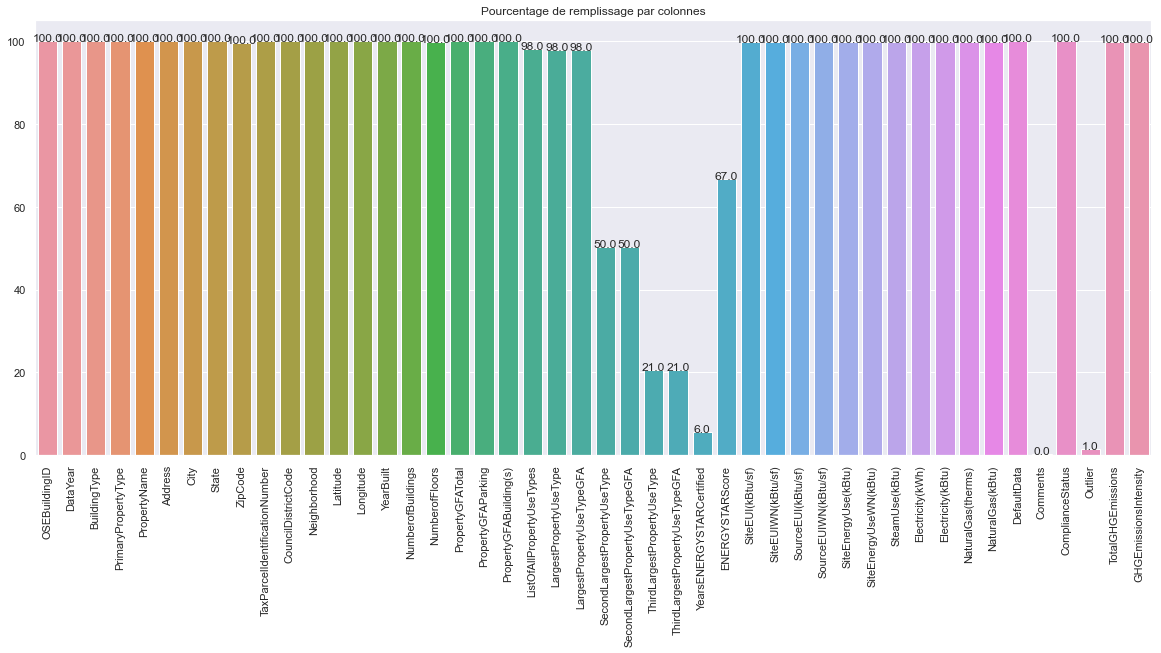

In [32]:
show_remplissage(data)

In [33]:
#Suppression des variables WN
# Ce sont les mesures normalisées avec les conditions climatiques.
# On va les supprimer
WN_col=data.columns[data.columns.str.contains('WN')]
print(WN_col)
data.drop(WN_col, axis=1, inplace=True)

In [34]:
#Suppression des variables redondantes
redundant_features = ['NaturalGas(therms)','Electricity(kWh)']
data.drop(redundant_features, axis=1, inplace=True)

Index(['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)'], dtype='object')


In [35]:
# Dans le cadre de nos modélisations, les targets sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu)) 
# et ses émissions de CO2 (TotalGHGEmissions). 
# Suppression des manquants sur ces variables :

data = data[~((data['SiteEnergyUse(kBtu)'].isnull()) | (data['TotalGHGEmissions'].isnull()))]

In [36]:
#La variable Comments va être supprimée :
data.drop("Comments", axis=1, inplace=True)

In [37]:
# La variable identifiant les outliers peut être interessante pour nos analyses, 
# cependant, dans la documentation, nous ne savons pas rééllement à quoi correspondent ces outliers. 
# Nous allons donc supprimer les lignes mentionnant ces outliers.

data = data[~data["Outlier"].isnull()==False]
data.drop('Outlier', axis=1, inplace=True)

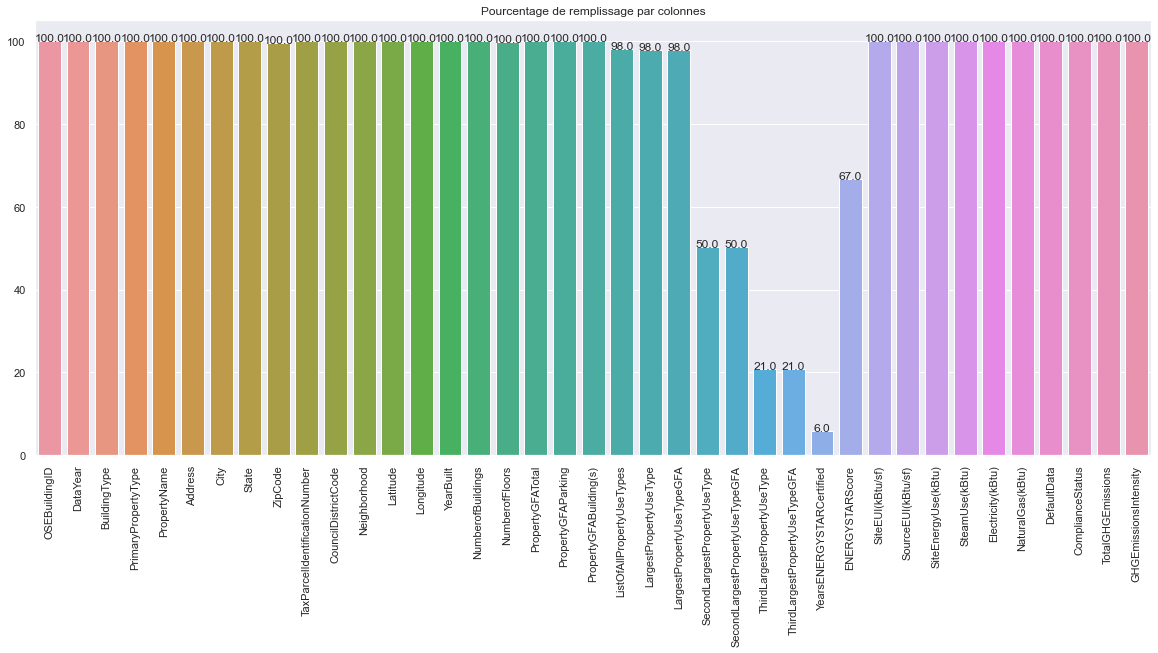

In [38]:
show_remplissage(data)

## 1.2 Analyse exploratoire et Feature Engineering
### 1.2.1 Les types de batiments

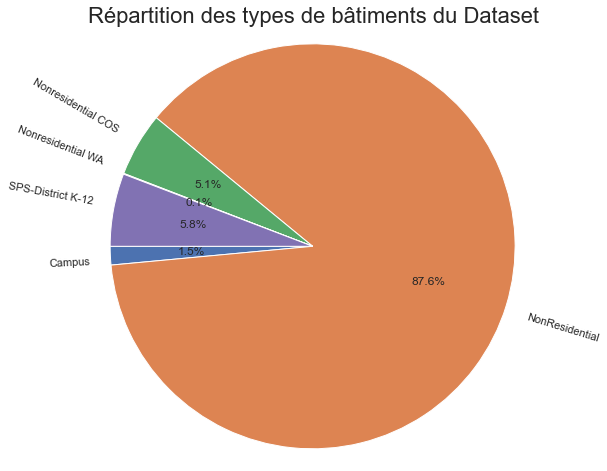

In [39]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].nunique()

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(building_type.values, labels=building_type.index, 
       autopct='%1.1f%%', startangle=180,rotatelabels=True)
plt.axis('equal')
ax.set_title("Répartition des types de bâtiments du Dataset",fontsize=22)
plt.show()

In [40]:
data['Neighborhood'].value_counts()

DOWNTOWN                  712
GREATER DUWAMISH          679
MAGNOLIA / QUEEN ANNE     294
LAKE UNION                290
EAST                      241
NORTHEAST                 236
NORTHWEST                 168
BALLARD                   132
NORTH                     122
CENTRAL                   100
SOUTHEAST                  92
DELRIDGE                   87
SOUTHWEST                  80
North                       9
Ballard                     6
Central                     5
Northwest                   5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [41]:
data['Neighborhood']=data['Neighborhood'].str.upper().replace(['DELRIDGE NEIGHBORHOODS'],'DELRIDGE')
data['Neighborhood'].value_counts()

DOWNTOWN                 712
GREATER DUWAMISH         679
MAGNOLIA / QUEEN ANNE    294
LAKE UNION               290
EAST                     241
NORTHEAST                236
NORTHWEST                173
BALLARD                  138
NORTH                    131
CENTRAL                  105
DELRIDGE                  92
SOUTHEAST                 92
SOUTHWEST                 80
Name: Neighborhood, dtype: int64

In [42]:
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    571
Other                          499
Large Office                   331
K-12 School                    267
Mixed Use Property             219
Non-Refrigerated Warehouse     187
Warehouse                      187
Retail Store                   185
Hotel                          146
Worship Facility               141
Medical Office                  82
Distribution Center             55
Distribution Center\n           51
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Self-Storage Facility           29
Self-Storage Facility\n         27
Refrigerated Warehouse          25
University                      24
College/University              21
Residence Hall                  21
Hospital                        20
Residence Hall/Dormitory        15
Restaurant                      13
Laboratory                      11
Restaurant\n                    10
Low-Rise Multifamily             4
SPS-District K-12   

In [43]:
regex = re.compile(r'[\n\r\t]')
data['PrimaryPropertyType'] = [regex.sub("", item) for index, item in data.PrimaryPropertyType.iteritems()]
data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    571
Other                          499
Large Office                   331
K-12 School                    267
Mixed Use Property             219
Non-Refrigerated Warehouse     187
Warehouse                      187
Retail Store                   185
Hotel                          146
Worship Facility               141
Distribution Center            106
Medical Office                  82
Self-Storage Facility           56
Supermarket / Grocery Store     40
Senior Care Community           39
Supermarket/Grocery Store       36
Refrigerated Warehouse          25
University                      24
Restaurant                      23
College/University              21
Residence Hall                  21
Hospital                        20
Residence Hall/Dormitory        15
Laboratory                      11
Low-Rise Multifamily             4
SPS-District K-12                4
Office                           3
Name: PrimaryPropertyType, dtype: int64

### 1.2.2 Les années de construction

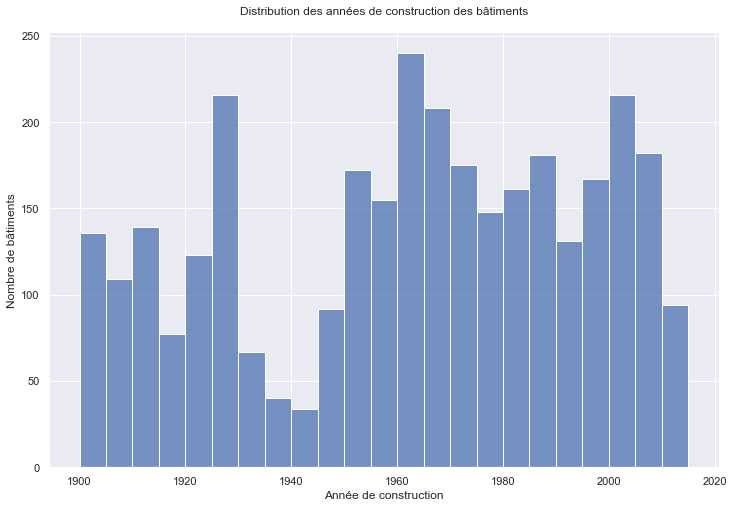

In [44]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='YearBuilt', bins=int((data.YearBuilt.max() - data.YearBuilt.min())/5))
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution des années de construction des bâtiments\n",)
plt.show()

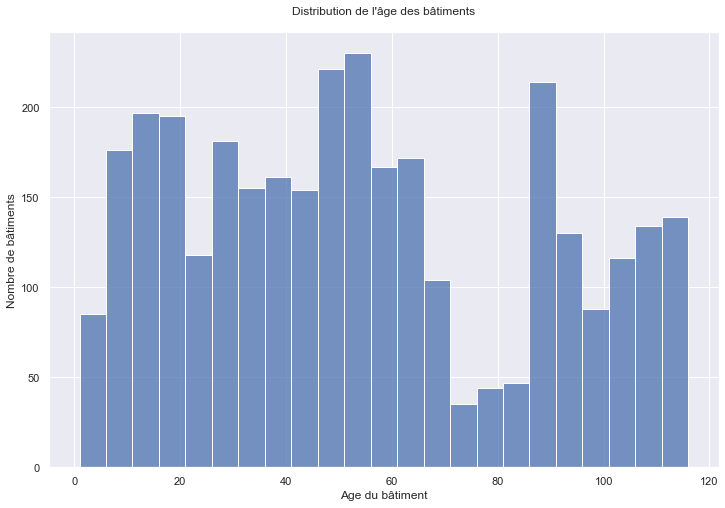

In [45]:
data['BuildingAge'] = data['DataYear'] - data['YearBuilt']
data.drop('YearBuilt', axis=1, inplace=True)

fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=data, x='BuildingAge', bins=int((data.BuildingAge.max() - data.BuildingAge.min())/5))
ax.set_xlabel("Age du bâtiment")
ax.set_ylabel("Nombre de bâtiments")
plt.title(f"Distribution de l'âge des bâtiments\n",)
plt.show()

### 1.2.3 Les corrélations linéaires

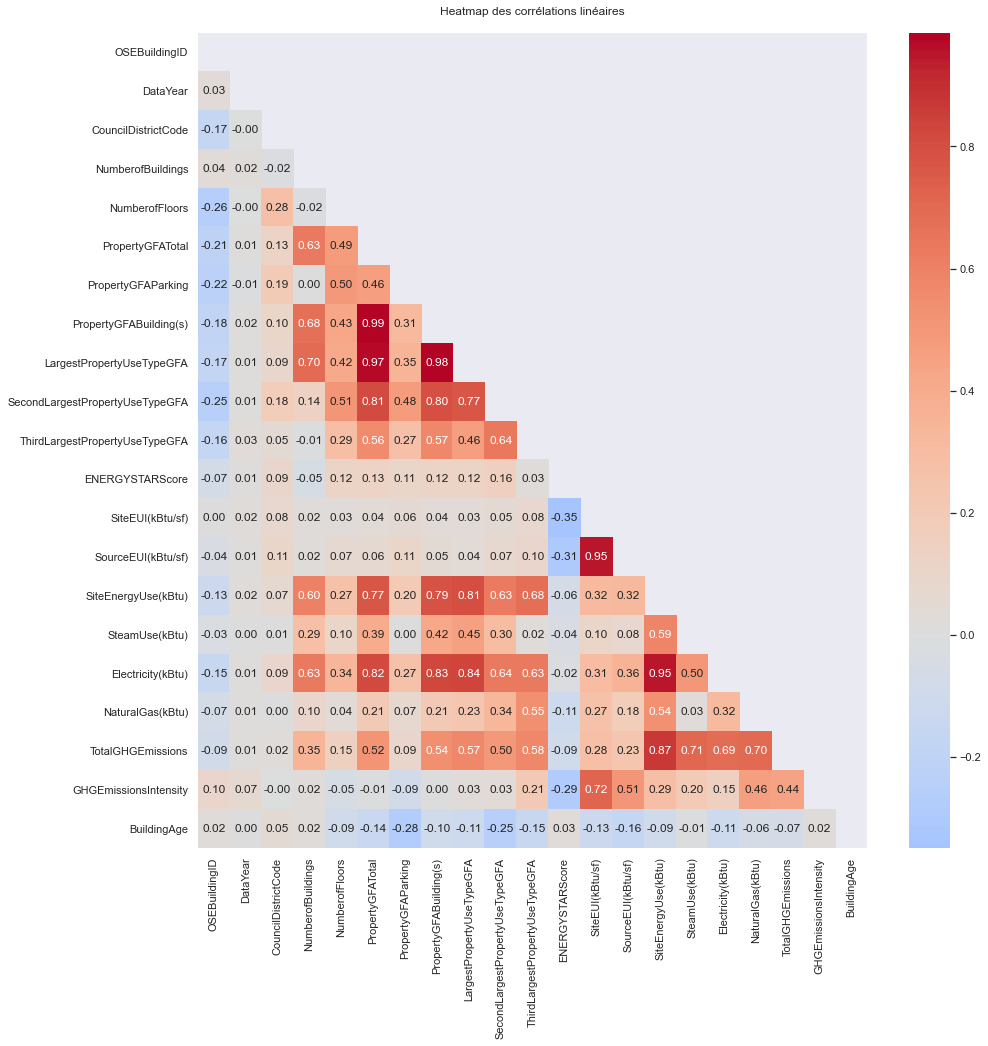

In [46]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [47]:
# Création d'une variable donnant le nombre total d'usage du bâtiment, 
# puis suppression de la liste des usages :

data['TotalUseTypeNumber'] = [str(word).count(",") + 1 for word in data['ListOfAllPropertyUseTypes'].str.split(',')]
data.drop('ListOfAllPropertyUseTypes', axis=1, inplace=True)

(3261, 40)
2 valeurs excedant 100 pour la variable'Parking/building rate'


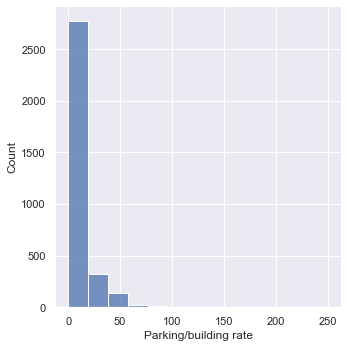

In [48]:
data["Parking/building rate"]=data["PropertyGFAParking"]/data["PropertyGFATotal"]*100
sns.displot(data=data,x="Parking/building rate")

outliers=data.loc[data["Parking/building rate"]>100]
data=data.loc[data["Parking/building rate"]<=100]
print(data.shape)

print("{} valeurs excedant 100 pour la variable'Parking/building rate'".format(outliers.shape[0]))
outliers.head(5)
data.drop(["Parking/building rate"],axis=1,inplace=True)

In [49]:
# Nous allons à présent convertir les différentes surfaces (Buildings et Parking) en pourcentage de la surface totale et 
# nous conserverons uniquement ces 2 variables en supprimant les variables LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA :
GFA_col=data.columns[data.columns.str.contains('GFA')]
data[['TotalUseTypeNumber'] + list(GFA_col)].head(10)

,TotalUseTypeNumber,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,1,88434,0,88434,88434.0,NaN,NaN
1,3,103566,15064,88502,83880.0,15064.0,4622.0
2,3,961990,0,961990,757243.0,100000.0,0.0
4,3,119890,12460,107430,123445.0,68009.0,0.0
5,1,97288,37198,60090,88830.0,NaN,NaN
6,1,83008,0,83008,81352.0,NaN,NaN
7,1,102761,0,102761,102761.0,NaN,NaN
8,1,163984,0,163984,163984.0,NaN,NaN
10,1,153163,19279,133884,NaN,NaN,NaN
11,1,333176,61161,272015,336640.0,NaN,NaN


In [50]:
#On calcule les ratios
data['GFABuildingRate'] = (round((data['PropertyGFABuilding(s)'].fillna(0)/data['PropertyGFATotal'].fillna(0)),5))
data['GFAParkingRate'] = (round((data['PropertyGFAParking'].fillna(0)/data['PropertyGFATotal'].fillna(0)),5))

#On supprime les variables inutiles
data.drop(['SecondLargestPropertyUseTypeGFA','SecondLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','PropertyGFAParking','PropertyGFABuilding(s)'],
         axis=1, inplace=True)

#On complète les usages de la partie la plus large
data.loc[:,'LargestPropertyUseType'] = data.loc[:,'LargestPropertyUseType'].fillna("Unknown")
data.loc[:,'NumberofFloors'] = data.loc[:,'NumberofFloors'].fillna(1)

# Nous pouvons également calculer la surface moyenne par bâtiment et par étage :

data.loc[:,'GFAPerBuilding'] = round((data.loc[:,'PropertyGFATotal'] / data.loc[:,'NumberofBuildings']),3)
data.loc[:,'GFAPerFloor'] = round((data.loc[:,'PropertyGFATotal'] / data.loc[:,'NumberofFloors']),3)

In [51]:
print(data['ComplianceStatus'].unique())
print("Nombre de ligne non conforme : {}.".format(data[data['ComplianceStatus'] != "Compliant"].shape[0]))

data = data[data['ComplianceStatus'] == "Compliant"]

data = data.drop(['DefaultData','ComplianceStatus', 'City',
                  'TaxParcelIdentificationNumber','YearsENERGYSTARCertified'], axis=1)

['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']
Nombre de ligne non conforme : 101.


In [52]:
eui_features = list(data.columns[data.columns.str.contains('EUI')])+['GHGEmissionsIntensity']
print(eui_features)
data.drop(eui_features, axis=1, inplace=True)

['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'GHGEmissionsIntensity']


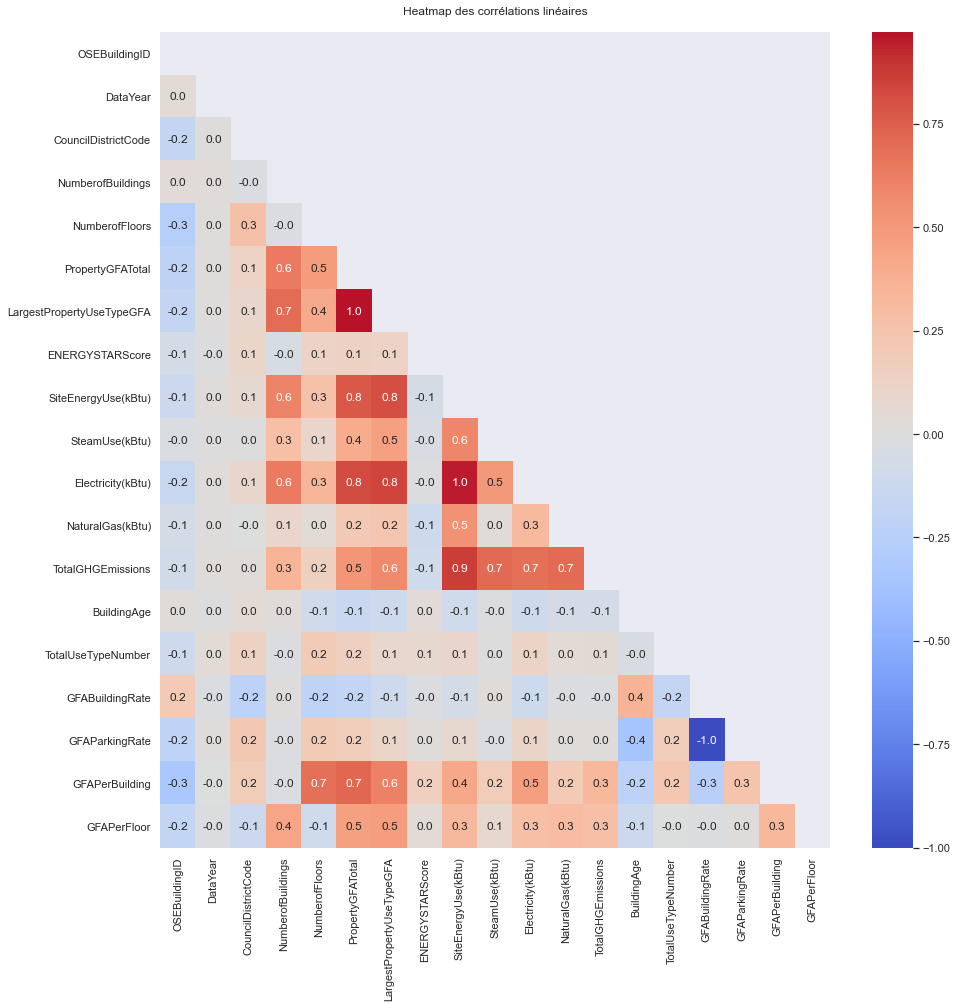

In [53]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".1f", mask=mask, center=0, cmap="coolwarm")
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

In [54]:
data[(data.GFAPerBuilding == np.inf) | (data.GFAPerFloor == np.inf)].head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,State,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor
166,267,2015,NonResidential,Hotel,PINE ST. CONDO-ELLIOTT GRAND HYATT SEATTLE,721 PINE ST,WA,98101,7,DOWNTOWN,47.61267744,-122.33393177,1.0,0.0,934292,Hotel,495536.0,NaN,63811044.0,0.0,39667989.0,24144689.0,1558.85,16,5,1.00000,0.00000,934292.0,inf
489,656,2015,NonResidential,Medical Office,1221 MADISON STREET (FORMER ARNOLD MED. PAVILLON),1221 MADISON ST,WA,98104,3,EAST,47.60967963,-122.3231052,1.0,0.0,225982,Medical Office,200184.0,61.0,18558162.0,6765824.0,11792829.0,0.0,604.45,11,1,1.00000,0.00000,225982.0,inf
490,657,2015,NonResidential,Mixed Use Property,2200 WESTLAKE,2200 WESTLAKE AVE,WA,98121,7,DOWNTOWN,47.617939,-122.33738708,1.0,0.0,516407,Parking,385196.0,19.0,48981052.0,0.0,29882718.0,19099575.0,1222.69,9,7,1.00000,0.00000,516407.0,inf
565,758,2015,NonResidential,Other,PACIFIC PLACE,600 PINE ST,WA,98101,7,DOWNTOWN,47.61287405,-122.335276,1.0,0.0,947987,Other - Mall,561684.0,NaN,48143224.0,0.0,48145216.0,0.0,335.63,16,4,0.53566,0.46434,947987.0,inf
1775,23311,2015,NonResidential,Other,FIRST HILL MEDICAL PAVILLION,1124 COLUMBIA ST,WA,98104,3,EAST,47.60830458,-122.3233504,1.0,0.0,274568,Unknown,NaN,NaN,25246386.0,13364736.0,11882142.0,0.0,1114.43,70,1,1.00000,0.00000,274568.0,inf


In [55]:
data['GFAPerBuilding'] = np.where(((data.GFAPerBuilding == np.inf) & (data.NumberofBuildings == 0)),0, data.GFAPerBuilding)
data['GFAPerFloor'] = np.where(((data.GFAPerFloor == np.inf)
                                & (data.NumberofFloors == 0)),0, data.GFAPerFloor)

In [56]:
# La variable LargestPropertyUseTypeGFA est remplie à 96%
# On supprime les valeurs manquantes 
data = data[~(data['LargestPropertyUseTypeGFA'].isnull())]

### 1.2.4 Les variables à prédire

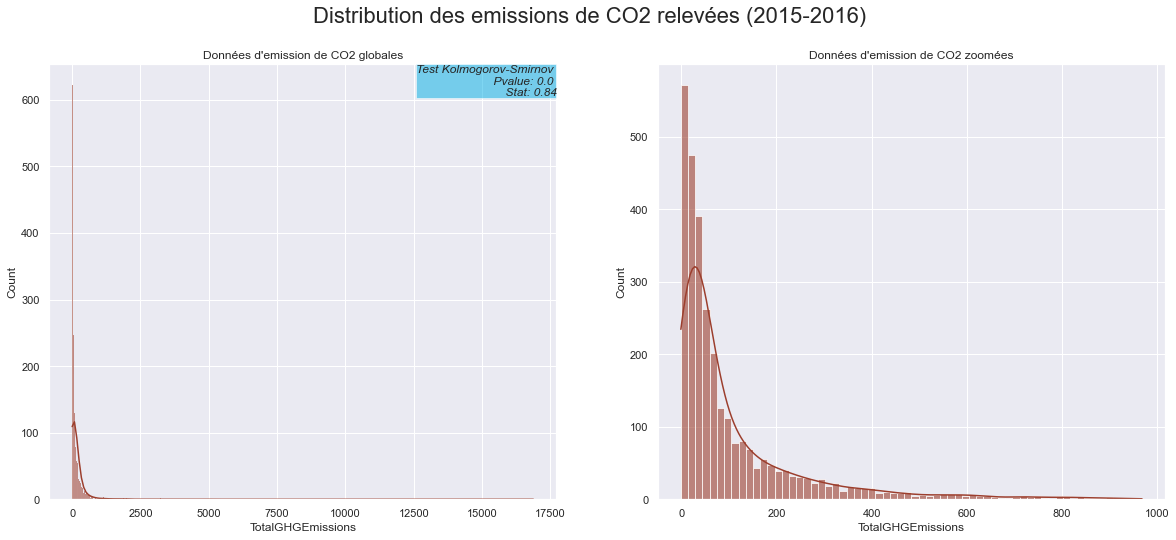

In [57]:
import scipy.stats as stats
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

sns.histplot(data=data, x="TotalGHGEmissions", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Données d'emission de CO2 globales")

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['TotalGHGEmissions'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['TotalGHGEmissions']< 1000)], x="TotalGHGEmissions", kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)
axes[1].set_title("Données d'emission de CO2 zoomées")

plt.suptitle("Distribution des emissions de CO2 relevées (2015-2016)", fontsize=22)
plt.show()

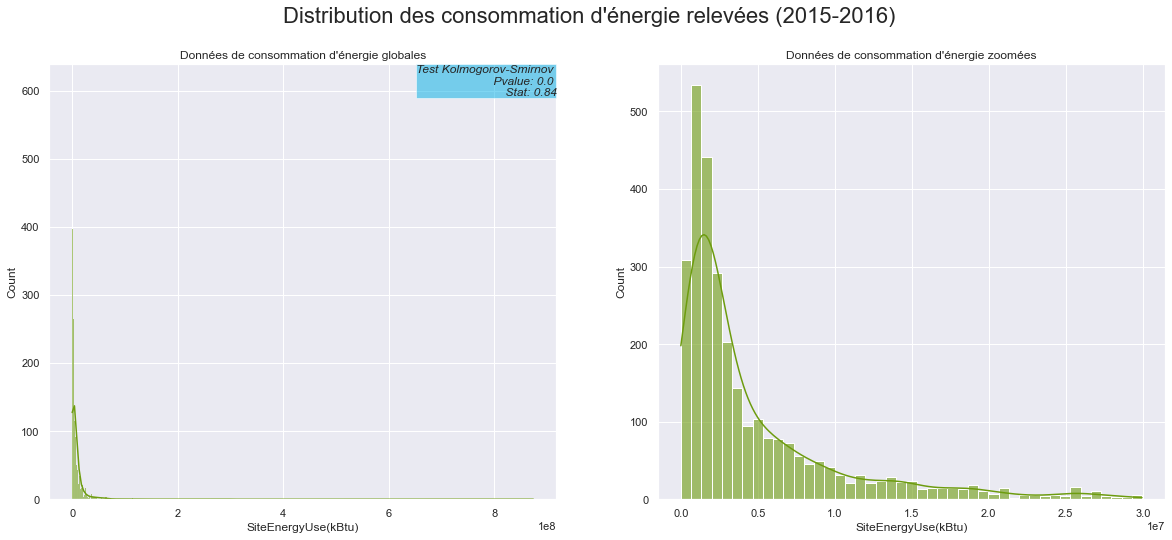

In [58]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=data, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#6D9C0E", alpha=0.6)
axes[0].set_title("Données de consommation d'énergie globales")

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(data['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

sns.histplot(data=data[(data['SiteEnergyUse(kBtu)']< 0.3*10**8)], x="SiteEnergyUse(kBtu)", kde=True, ax=axes[1], color="#6D9C0E", alpha=0.6)
axes[1].set_title("Données de consommation d'énergie zoomées")

plt.suptitle("Distribution des consommation d'énergie relevées (2015-2016)",fontsize=22)
plt.show()


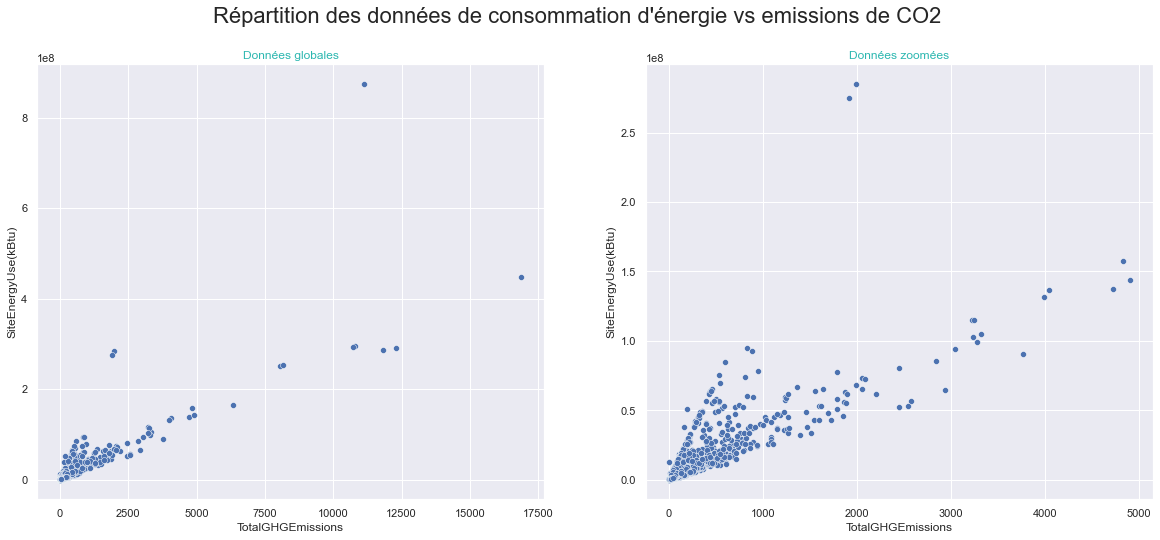

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("Données globales", color='#2cb7b0')
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 5000)], x="TotalGHGEmissions", y="SiteEnergyUse(kBtu)", ax=axes[1])
axes[1].set_title("Données zoomées", color='#2cb7b0')
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2",fontsize=22)
plt.show()

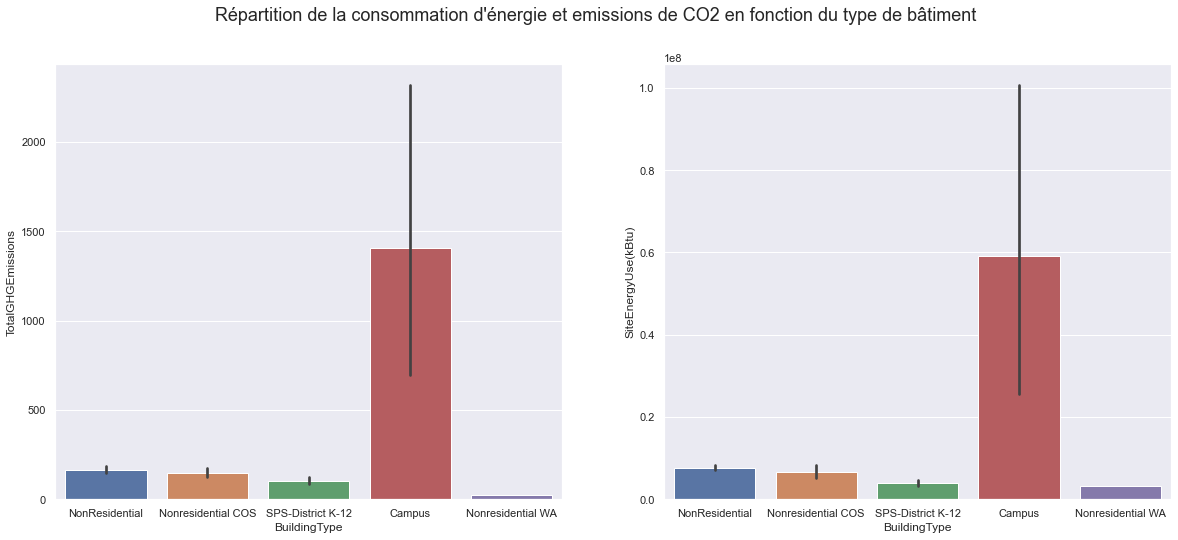

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data, ax=axes[0])
sns.barplot(x='BuildingType',y='SiteEnergyUse(kBtu)',data=data, ax=axes[1])
plt.suptitle("Répartition de la consommation d'énergie et emissions de CO2 en fonction du type de bâtiment", fontsize=18)
plt.show()

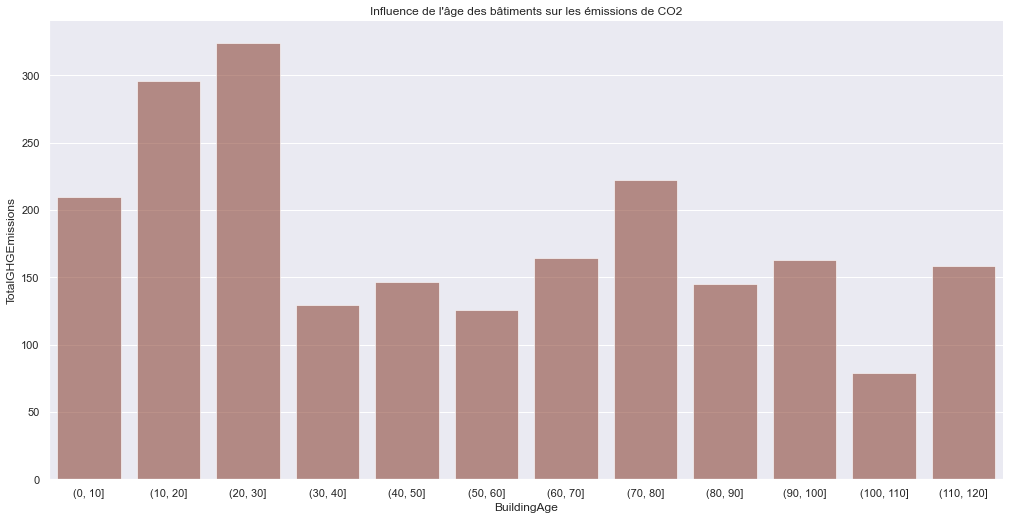

In [61]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

sns.catplot(data=data, kind="bar",x=pd.cut(data['BuildingAge'], bins=bins), y="TotalGHGEmissions",ci=None, color="#9C3E2D", alpha=.6,height=7, aspect=2)
plt.title("Influence de l'âge des bâtiments sur les émissions de CO2")
plt.show()

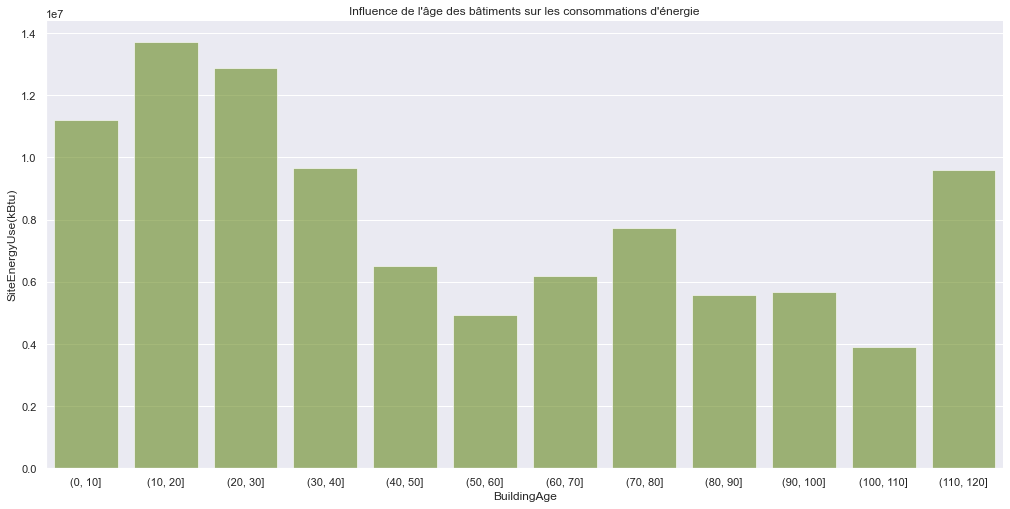

In [62]:
sns.catplot(data=data, kind="bar",x=pd.cut(data['BuildingAge'], bins=bins), y="SiteEnergyUse(kBtu)",ci=None, color="#6D9C0E", alpha=.6, height=7, aspect=2)
plt.title("Influence de l'âge des bâtiments sur les consommations d'énergie")
plt.show()

In [63]:
pip install folium


Note: you may need to restart the kernel to use updated packages.


In [64]:
import folium
import folium.plugins

seattle_lat = 47.6062
seattle_lon = -122.3321

seattle_map = folium.Map(location=[seattle_lat, seattle_lon], zoom_start=11)

marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_map)
for lat, lng, in zip(data.Latitude, data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

seattle_map

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3091 entries, 0 to 3375
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              3091 non-null   int64  
 1   DataYear                   3091 non-null   int64  
 2   BuildingType               3091 non-null   object 
 3   PrimaryPropertyType        3091 non-null   object 
 4   PropertyName               3091 non-null   object 
 5   Address                    3091 non-null   object 
 6   State                      3091 non-null   object 
 7   ZipCode                    3078 non-null   object 
 8   CouncilDistrictCode        3091 non-null   int64  
 9   Neighborhood               3091 non-null   object 
 10  Latitude                   3091 non-null   object 
 11  Longitude                  3091 non-null   object 
 12  NumberofBuildings          3091 non-null   float64
 13  NumberofFloors             3091 non-null   float

In [66]:
from math import radians, cos, sin, asin, sqrt
seattle_lat = 47.6062
seattle_lon = -122.3321

def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    r = 3956 # rayon de la Terre en miles
    
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * r * asin(sqrt(a))  

    return d
#Calcul des distance au centre de Seattle pour chaque point
data['harvesine_distance'] = [haversine_distance(seattle_lat, seattle_lon, x, y) 
                              for x, y in zip(data.Latitude.astype(float), data.Longitude.astype(float))]

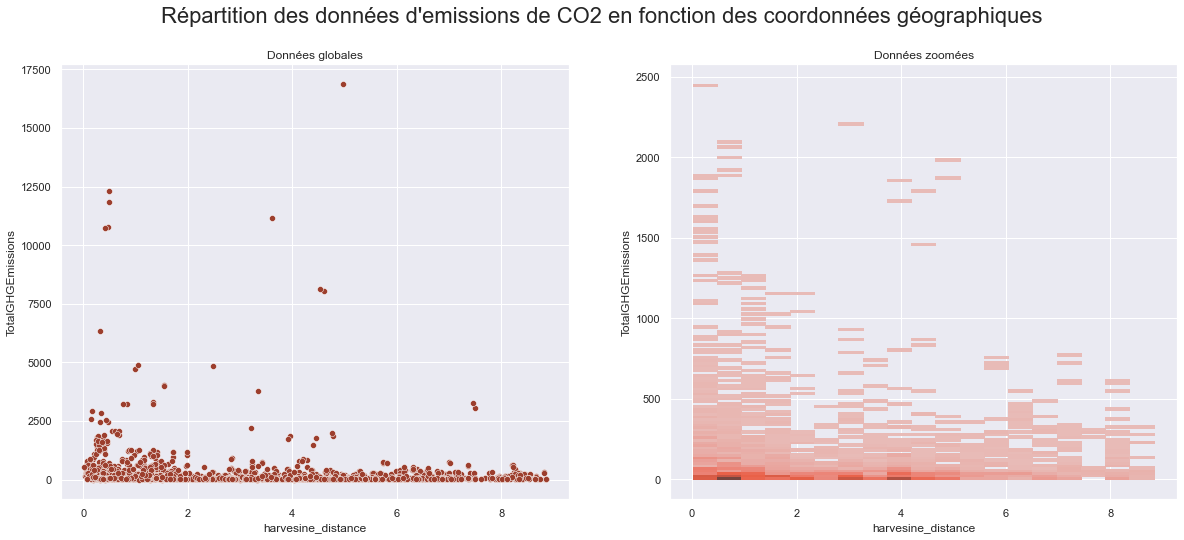

In [67]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="TotalGHGEmissions", x="harvesine_distance", color="#9C3E2D", ax=axes[0])
axes[0].set_title("Données globales")
sns.histplot(data=data[(data['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="#9C3E2D", ax=axes[1])
axes[1].set_title("Données zoomées")
plt.suptitle("Répartition des données d'emissions de CO2 en fonction des coordonnées géographiques", fontsize=22)
plt.show()

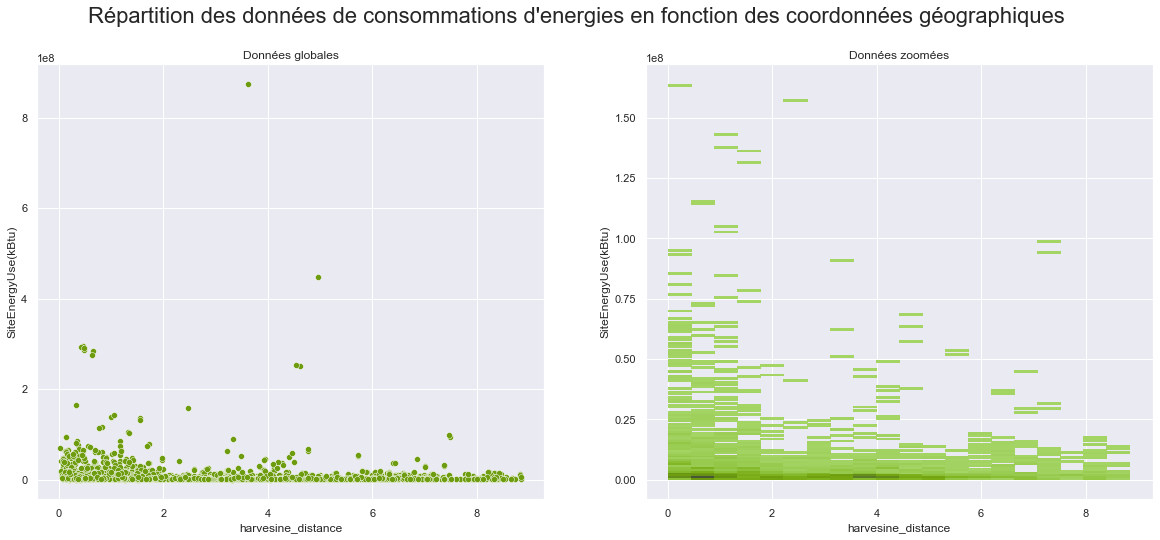

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="#6D9C0E", ax=axes[0])
axes[0].set_title("Données globales")
sns.histplot(data=data[(data['SiteEnergyUse(kBtu)'] < 2*10**8)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="#6D9C0E", ax=axes[1])
axes[1].set_title("Données zoomées")
plt.suptitle("Répartition des données de consommations d'energies en fonction des coordonnées géographiques",fontsize=22)
plt.show()

In [69]:
# En regardant ces projections, il semble que les coordonnées géographiques 
#(donc les adresses des bâtiments) peuvent avoir un impact sur les consommations d'énergie et rejets de CO2.
# D'autre part, la latitude et la longitude étant 2 variables fortement corrélées dans notre jeu de données, 
#nous allons supprimer ces 2 colonnes pour conserver uniquement ce point de coordonnée unique Harvesine.
data.drop(['Longitude','Latitude'],axis=1,inplace=True)

In [70]:
def show_box_plot(data,quant,qual):
    sous_echantillon=data[[qual,quant]].copy()
    modalites = sous_echantillon[qual].unique()

    groupes = []
    for m in modalites:
        groupes.append(sous_echantillon[sous_echantillon[qual]==m][quant])

    # Propriétés graphiques (pas très importantes)    
    medianprops = {'color':"black"}
    meanprops = {'marker':'o', 'markeredgecolor':'black',
                'markerfacecolor':'firebrick'}
    plt.figure(figsize=(20,8)) 
    plt.title("{} distribution by {}".format(quant, qual),size=16)
    plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
                vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    plt.show() 

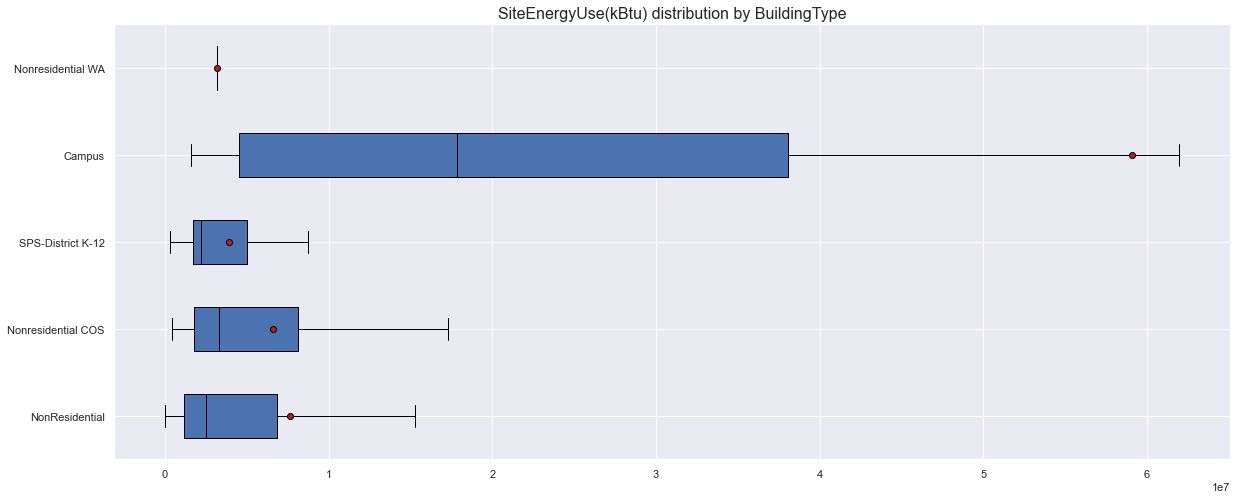

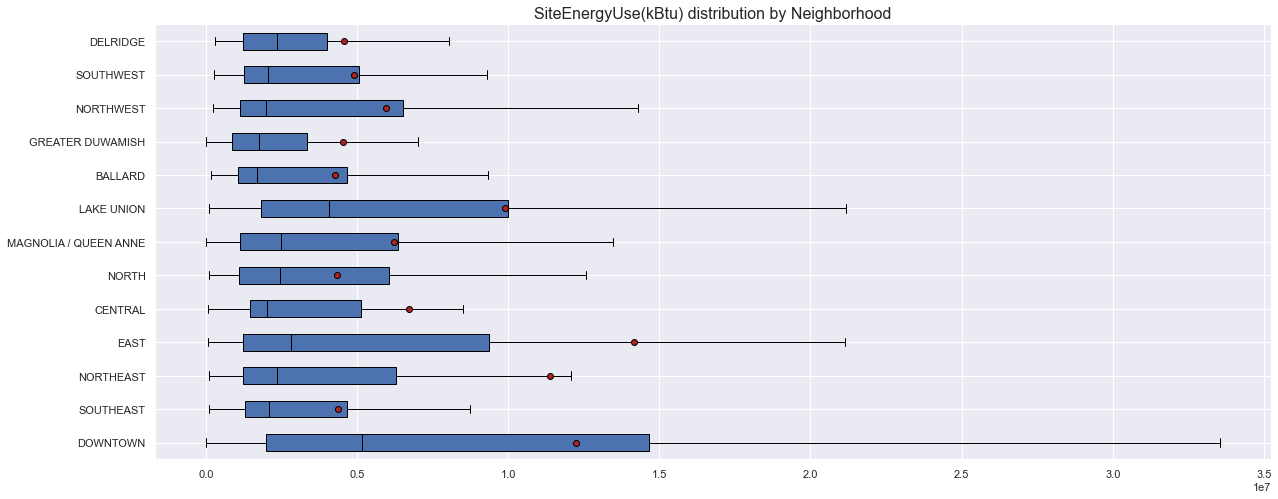

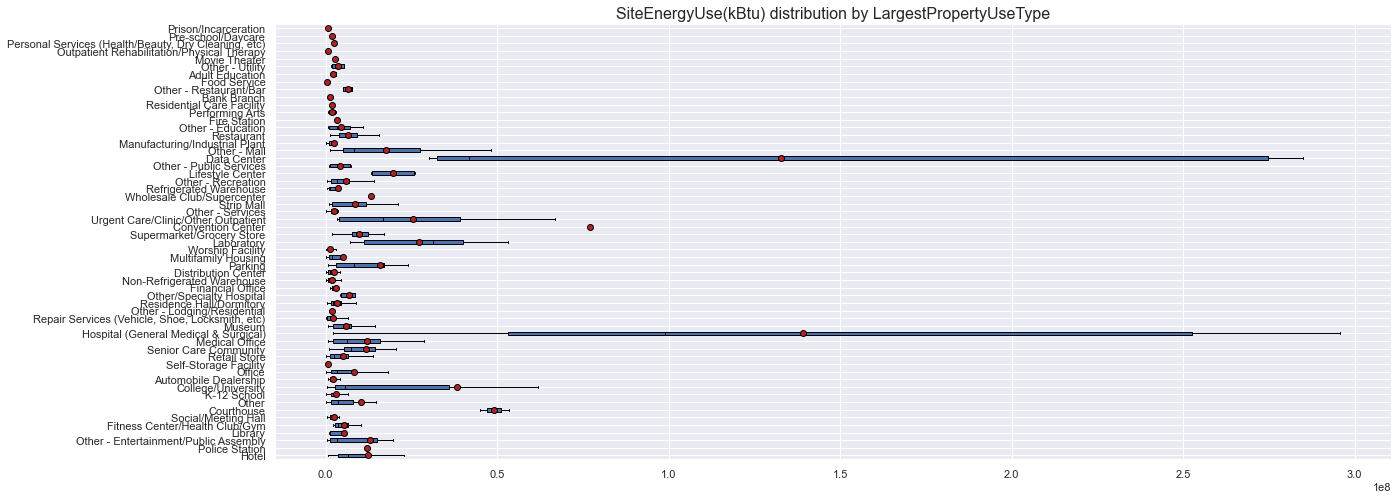

In [71]:
X = "BuildingType" # qualitative
Y = "SiteEnergyUse(kBtu)" # quantitative

show_box_plot(data,Y,X) 

X = 'Neighborhood' # qualitative

show_box_plot(data,Y,X)

X = 'LargestPropertyUseType' # qualitative

show_box_plot(data,Y,X)

In [72]:
borne=round(np.percentile(data[Y].values, 95),2)
data=data.loc[data[Y]<borne]
borne2=round(np.percentile(data[Y].values, 5),2)
data=data.loc[data[Y]>borne2]
data.reset_index(inplace=True,drop=True)

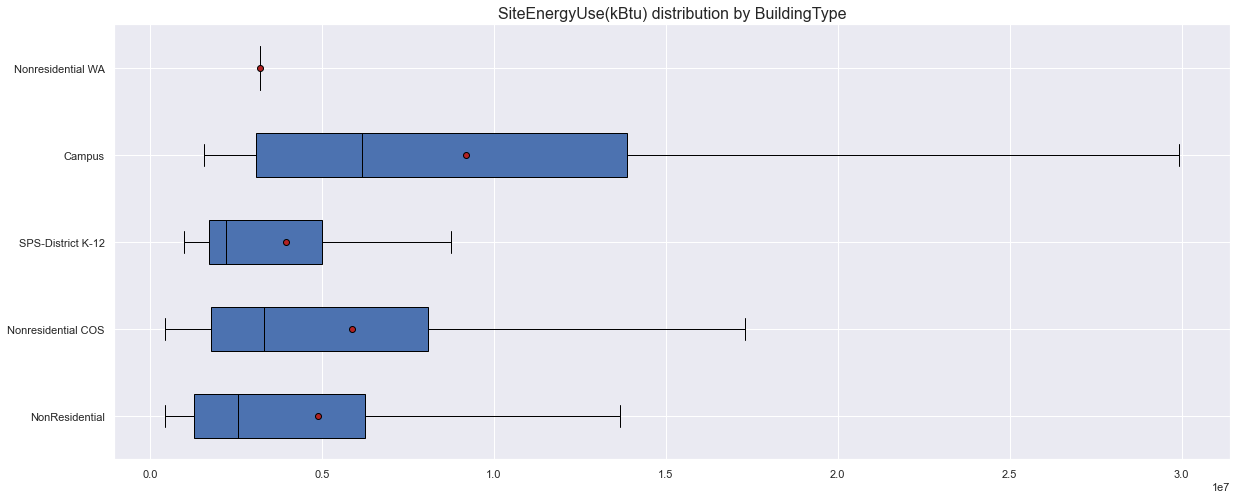

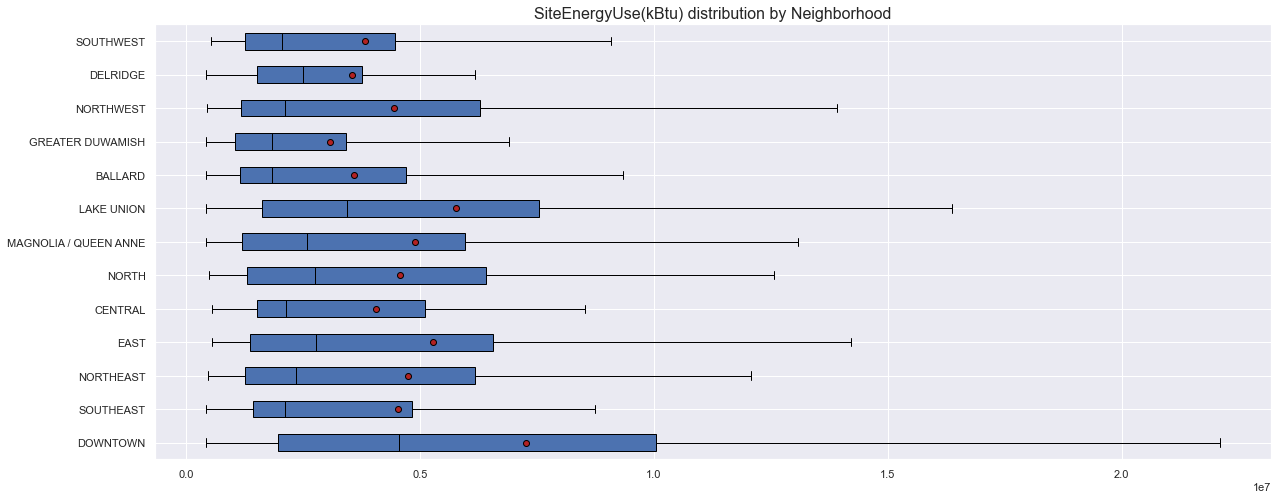

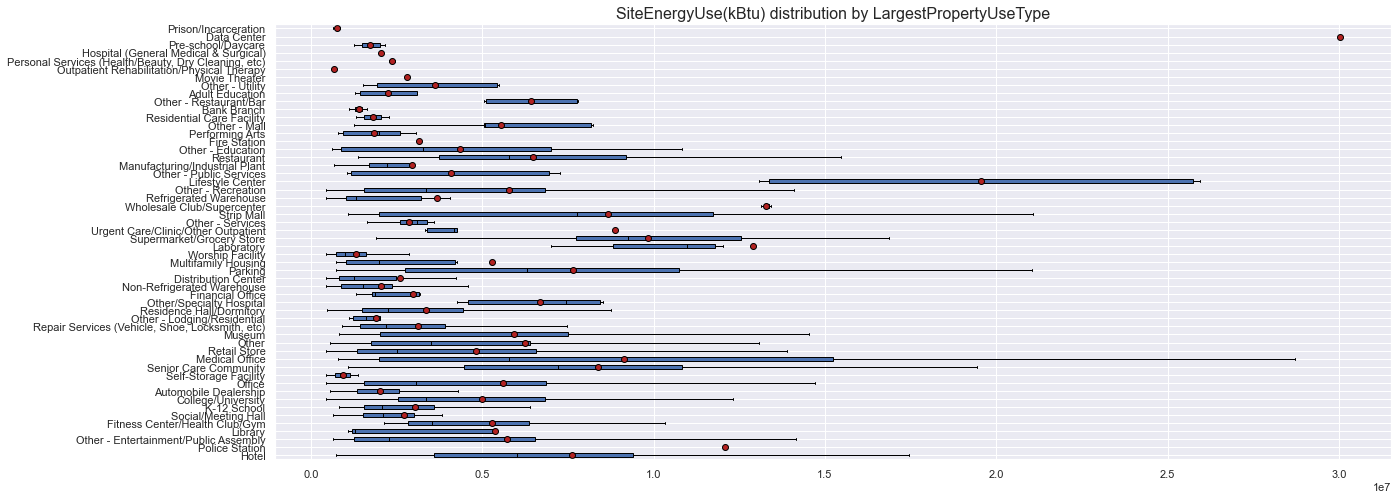

In [73]:
X = "BuildingType" # qualitative
Y = "SiteEnergyUse(kBtu)" # quantitative

show_box_plot(data,Y,X) 

X = 'Neighborhood' # qualitative

show_box_plot(data,Y,X)

X = 'LargestPropertyUseType' # qualitative

show_box_plot(data,Y,X)

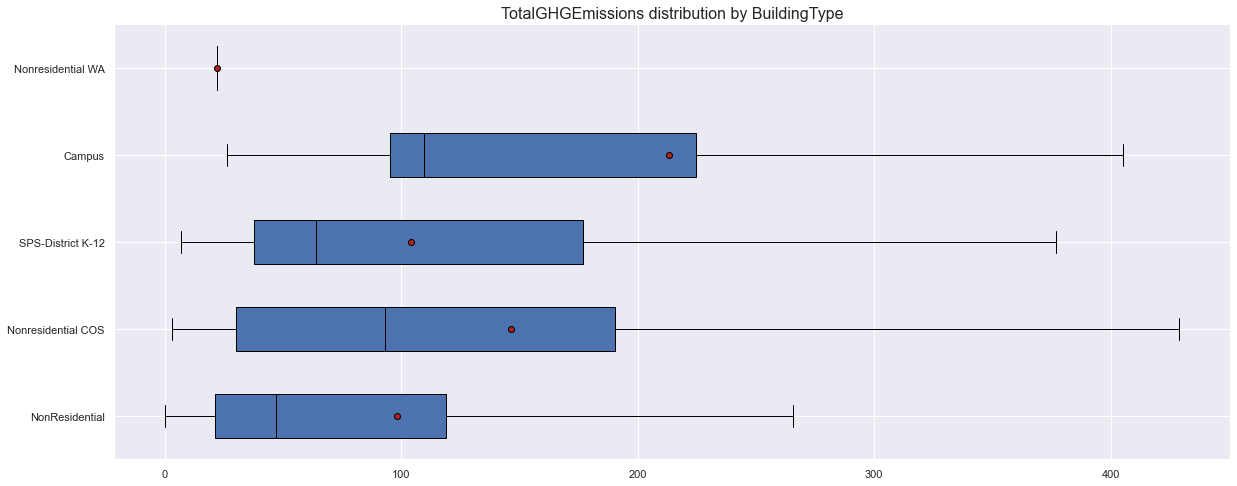

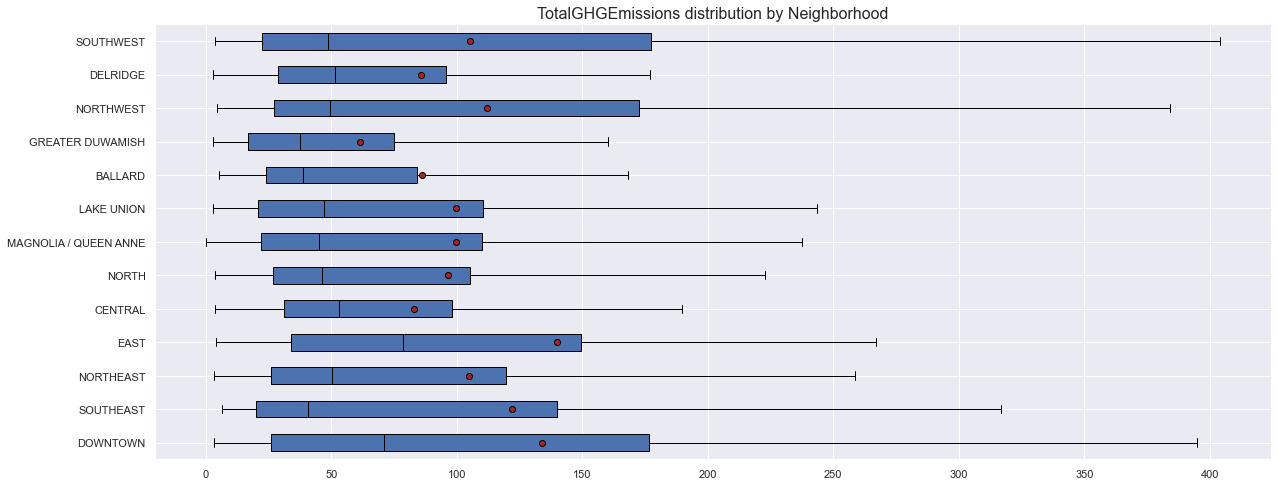

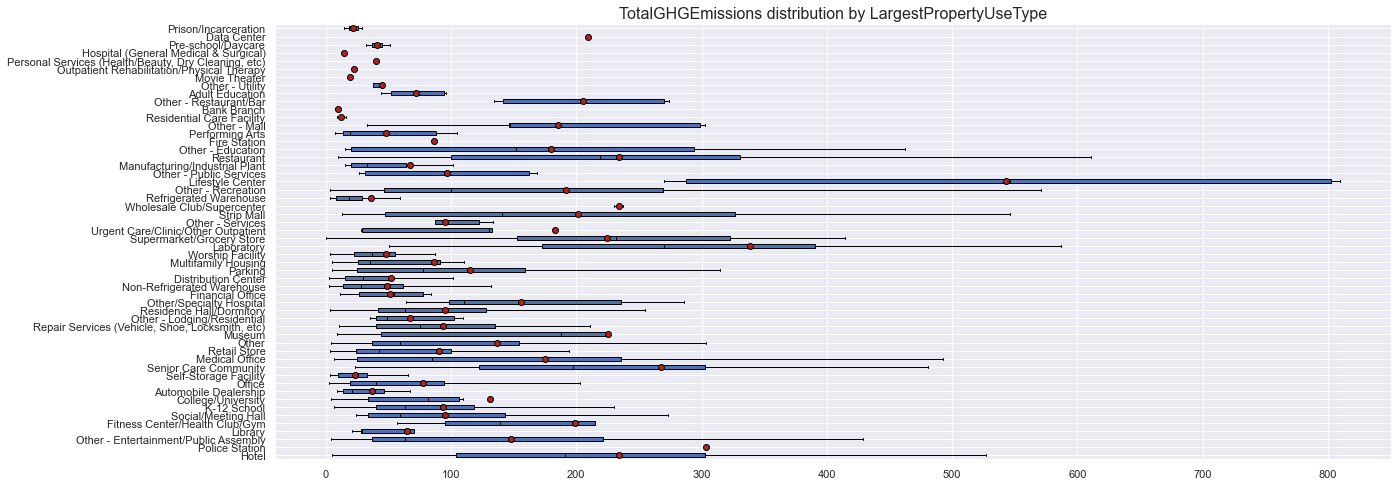

In [74]:
X = "BuildingType" # qualitative
Y = 'TotalGHGEmissions' # quantitative

show_box_plot(data,Y,X) 

X = 'Neighborhood' # qualitative

show_box_plot(data,Y,X)

X = 'LargestPropertyUseType' # qualitative

show_box_plot(data,Y,X)

In [75]:
borne=round(np.percentile(data[Y].values, 95),2)
data=data.loc[data[Y]<borne]
borne2=round(np.percentile(data[Y].values, 5),2)
data=data.loc[data[Y]>borne2]
data.reset_index(inplace=True,drop=True)

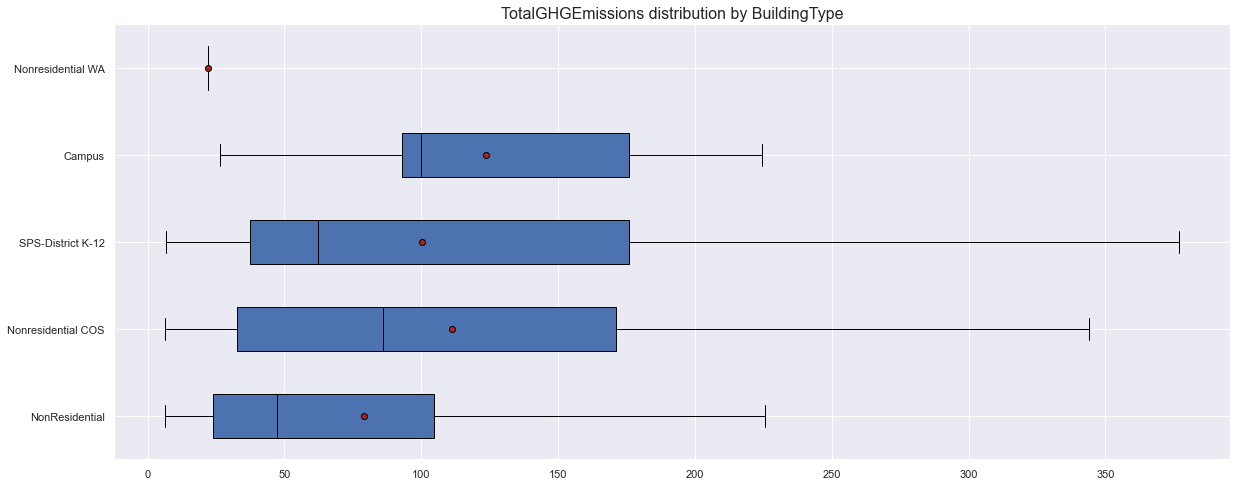

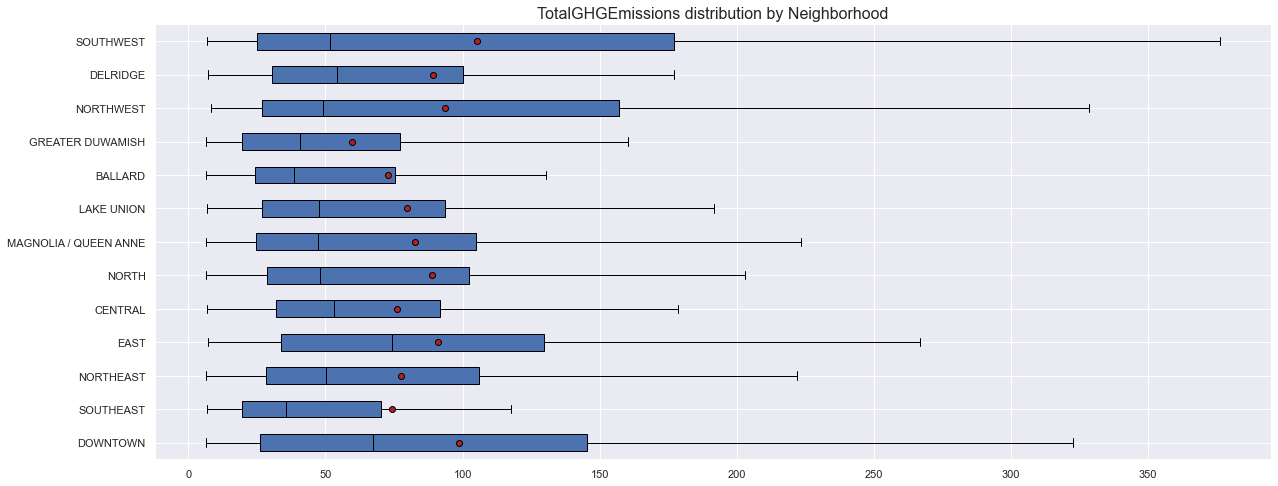

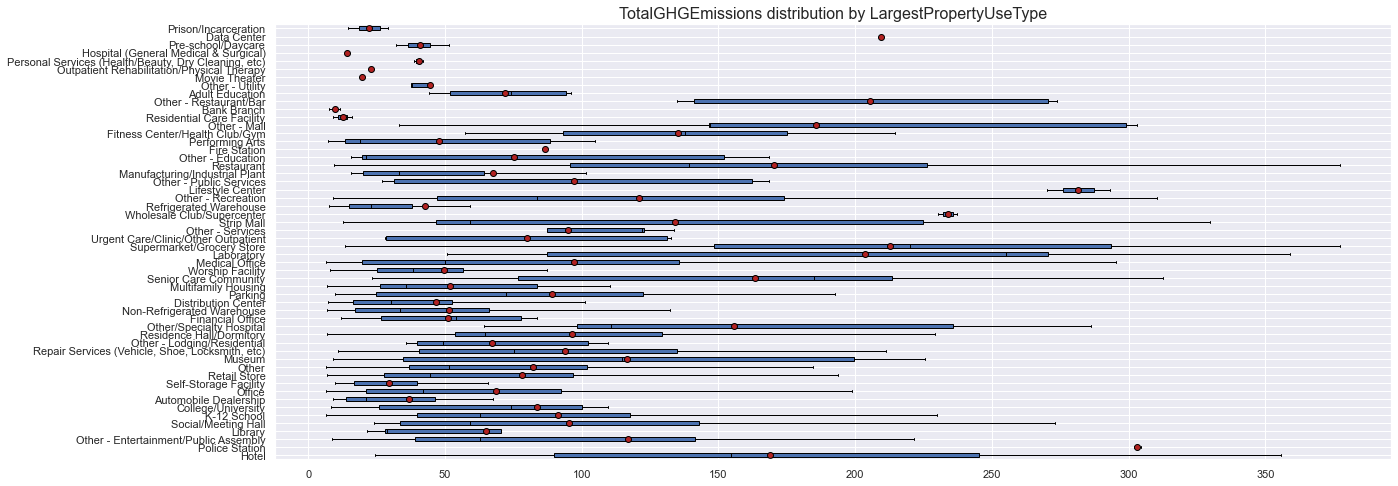

In [76]:
X = "BuildingType" # qualitative
Y = 'TotalGHGEmissions' # quantitative

show_box_plot(data,Y,X) 

X = 'Neighborhood' # qualitative

show_box_plot(data,Y,X)

X = 'LargestPropertyUseType' # qualitative

show_box_plot(data,Y,X)

In [77]:
# GradeComsuption seulement pour analyse descriptive pas modélisation car risque de sur-apprentissage

# Nouvelles colonnes liées au type d'énergie consommé (gas, électricité, steam) et au profil consommateur (élévé ou pas par rapport à la moyenne de consommation)
data["ElectricitySource"]= 0
data["GasSource"]= 0
data["SteamSource"]= 0
data["HighConsumer"]= 0
data["LowConsumer"]= 0

def GradeComsuption(mean,colval):
    if colval < mean:
      data["LowConsumer"][i] = 1
      data["HighConsumer"][i] = 0
    else:
      data["HighConsumer"][i] = 1
      data["LowConsumer"][i] = 0

for i in data.index: 
 a = data["Electricity(kBtu)"][i]
 b = data["NaturalGas(kBtu)"][i]
 c = data["SteamUse(kBtu)"][i] 
 if a<b :
  if b<c :
   data["ElectricitySource"][i] = 0
   data["GasSource"][i] = 0
   data["SteamSource"][i]= 1
   GradeComsuption(data["SteamUse(kBtu)"].mean(),data["SteamUse(kBtu)"][i])
  else :
   data["ElectricitySource"][i] = 0
   data["GasSource"][i] = 1
   data["SteamSource"][i]= 0
   GradeComsuption(data["NaturalGas(kBtu)"].mean(),data["NaturalGas(kBtu)"][i])
 else :
   data["ElectricitySource"][i] = 1
   data["GasSource"][i] = 0
   data["SteamSource"][i]= 0
   GradeComsuption(data["Electricity(kBtu)"].mean(),data["Electricity(kBtu)"][i])

<ipython-input-77-5f77dd704a18>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["ElectricitySource"][i] = 1
<ipython-input-77-5f77dd704a18>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["GasSource"][i] = 0
<ipython-input-77-5f77dd704a18>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["SteamSource"][i]= 0
<ipython-input-77-5f77dd704a18>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              2514 non-null   int64  
 1   DataYear                   2514 non-null   int64  
 2   BuildingType               2514 non-null   object 
 3   PrimaryPropertyType        2514 non-null   object 
 4   PropertyName               2514 non-null   object 
 5   Address                    2514 non-null   object 
 6   State                      2514 non-null   object 
 7   ZipCode                    2502 non-null   object 
 8   CouncilDistrictCode        2514 non-null   int64  
 9   Neighborhood               2514 non-null   object 
 10  NumberofBuildings          2514 non-null   float64
 11  NumberofFloors             2514 non-null   float64
 12  PropertyGFATotal           2514 non-null   int64  
 13  LargestPropertyUseType     2514 non-null   objec

In [79]:
#Nous allons regrouper les données d'identification des bâtiments afin qu'elles ne perturbent pas nos modélisations mais restent utilisables.

id_col = ['OSEBuildingID', 'PropertyName', 'Address', 'ZipCode','State']
data_identification = data[id_col]
data.drop(id_col, axis=1, inplace = True)

#Le but ici est de supprimer les relevés couteux. Nous allons donc exclure toutes les données de relève de notre dataset.

data = data.drop(['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)'], axis=1)

In [80]:
data

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,harvesine_distance,ElectricitySource,GasSource,SteamSource,HighConsumer,LowConsumer
0,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,12.0,88434,Hotel,88434.0,65.0,6.981428e+06,249.43,88,1,1.00000,0.00000,88434.0,7369.500,0.496412,1,0,0,1,0
1,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,11.0,103566,Hotel,83880.0,51.0,8.354235e+06,263.51,19,3,0.85455,0.14545,103566.0,9415.091,0.480394,0,1,0,1,0
2,2015,Nonresidential COS,Other,7,DOWNTOWN,1.0,2.0,97288,Police Station,88830.0,NaN,1.205198e+07,304.62,16,1,0.61765,0.38235,97288.0,48644.000,0.739535,1,0,0,1,0
3,2015,NonResidential,Hotel,7,DOWNTOWN,1.0,11.0,83008,Hotel,81352.0,25.0,6.252842e+06,208.46,89,1,1.00000,0.00000,83008.0,7546.182,0.547244,0,1,0,1,0
4,2015,NonResidential,Other,7,DOWNTOWN,1.0,8.0,102761,Other - Entertainment/Public Assembly,102761.0,NaN,6.426022e+06,199.99,89,1,1.00000,0.00000,102761.0,12845.125,0.464225,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2016,Nonresidential COS,Other,1,DELRIDGE,1.0,1.0,18261,Other - Recreation,18261.0,NaN,9.320821e+05,20.33,34,1,1.00000,0.00000,18261.0,18261.000,4.935141,1,0,0,0,1
2510,2016,Nonresidential COS,Other,2,DOWNTOWN,1.0,1.0,16000,Other - Recreation,16000.0,NaN,9.502762e+05,32.17,12,1,1.00000,0.00000,16000.0,16000.000,0.811312,0,1,0,0,1
2511,2016,Nonresidential COS,Other,7,MAGNOLIA / QUEEN ANNE,1.0,1.0,13157,Other - Recreation,7583.0,NaN,5.765898e+06,223.54,42,3,1.00000,0.00000,13157.0,13157.000,2.407156,0,1,0,1,0
2512,2016,Nonresidential COS,Mixed Use Property,1,GREATER DUWAMISH,1.0,1.0,14101,Other - Recreation,6601.0,NaN,7.194712e+05,22.11,27,5,1.00000,0.00000,14101.0,14101.000,5.389475,0,1,0,0,1


In [94]:
# on va supprimer 'DataYear' et 'harvesine_distance' pas corr aux targets pour la modélisation
data = data.drop(['DataYear'], axis=1)

In [81]:
# on supprime HighConsumer et LowConsumer trop liées aux relevés - risque de surapprentissage
data = data.drop(['LowConsumer','HighConsumer'], axis=1)

In [82]:
data = data.drop(['harvesine_distance'], axis=1)


In [83]:
# CouncilDistrictCode transformé en object
data['CouncilDistrictCode'] = data['CouncilDistrictCode'].astype('object')

In [84]:
# La variable ENERGYSTARScore est remplie à 67%
# On supprime les valeurs manquantes 
data = data[~(data['ENERGYSTARScore'].isnull())]

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 2500
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PrimaryPropertyType        1696 non-null   object 
 1   CouncilDistrictCode        1696 non-null   object 
 2   Neighborhood               1696 non-null   object 
 3   NumberofBuildings          1696 non-null   float64
 4   NumberofFloors             1696 non-null   float64
 5   PropertyGFATotal           1696 non-null   int64  
 6   LargestPropertyUseTypeGFA  1696 non-null   float64
 7   ENERGYSTARScore            1696 non-null   float64
 8   SiteEnergyUse(kBtu)        1696 non-null   float64
 9   TotalGHGEmissions          1696 non-null   float64
 10  BuildingAge                1696 non-null   int64  
 11  TotalUseTypeNumber         1696 non-null   int64  
 12  GFABuildingRate            1696 non-null   float64
 13  GFAParkingRate             1696 non-null   float

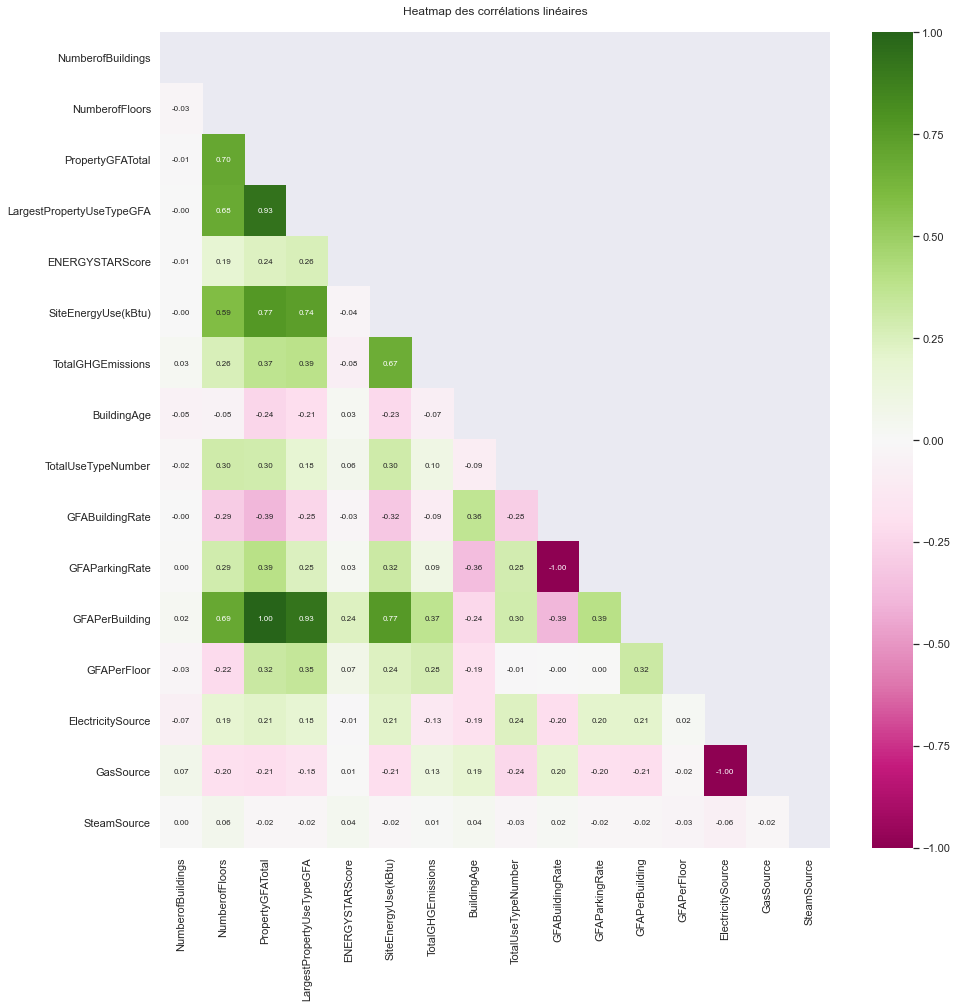

In [96]:
cor = data.corr()
mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(cor, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="PiYG",vmin=-1, vmax=1)
plt.title(f"Heatmap des corrélations linéaires\n")
plt.show()

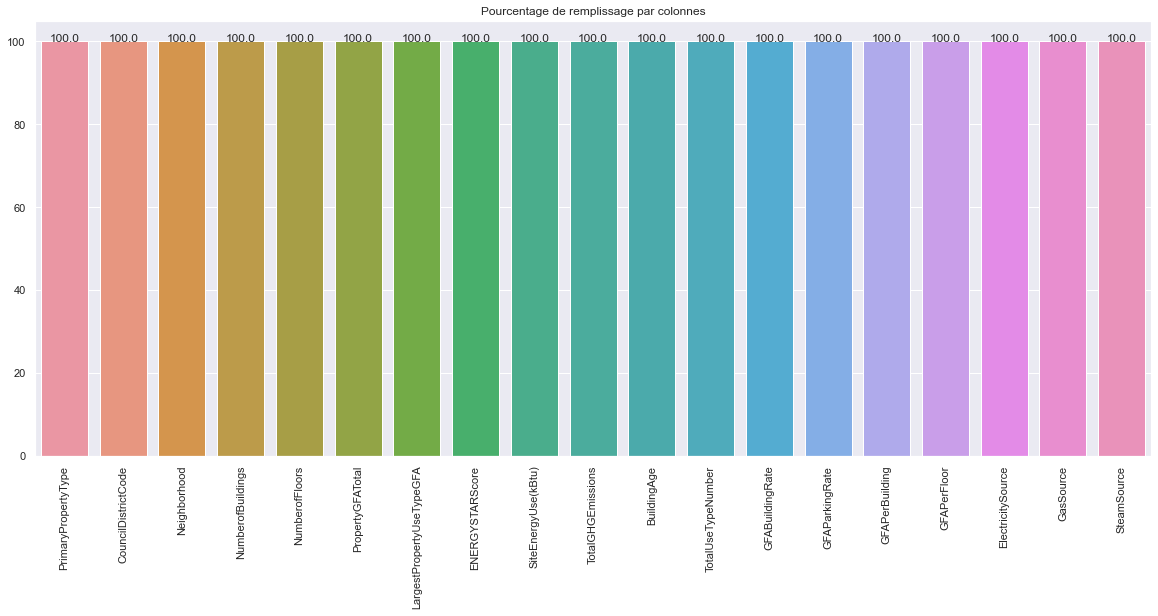

In [97]:
show_remplissage(data)

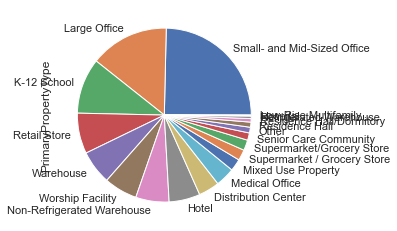

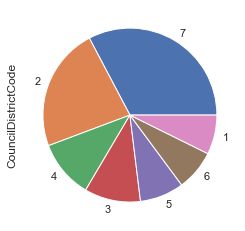

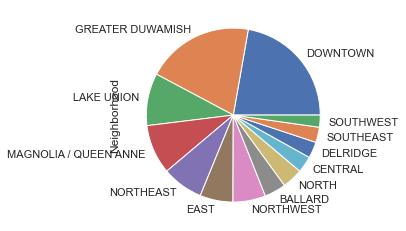

In [98]:
# Variables catégorielles : leurs valeurs en graphiques
for col in data.select_dtypes('object'):
    plt.figure()
    data[col].value_counts().plot.pie() 

In [75]:
# relation '' et variable qualitative
#pd.crosstab()
#for col in data.select_dtypes('object'):
#    plt.figure()
#    sns.heatmap(pd.crosstab(data[''],data[col]),annot=True,fmt='d')

In [89]:
# on va supprimer 'LargestPropertyUseType' redondant avec 'PrimaryPropertyType'
data = data.drop(['LargestPropertyUseType'], axis=1)

In [90]:
#'BuildingType' est de type residentiel - on le retire pour la modélisation
data = data.drop(['BuildingType'], axis=1)

In [99]:
# On va encoder les types object 
cat_col = list(_ for _ in data.select_dtypes("object").columns)
cat_col

['PrimaryPropertyType', 'CouncilDistrictCode', 'Neighborhood']

In [100]:
# Encodage
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from category_encoders import OneHotEncoder
#from sklearn.preprocessing import CategoricalEncoder
ce = OneHotEncoder(cols=cat_col, handle_missing='value',
                   drop_invariant=False, handle_unknown='value')
data_cat = ce.fit_transform(data)
data_cat.head()

,PrimaryPropertyType_1,PrimaryPropertyType_2,PrimaryPropertyType_3,PrimaryPropertyType_4,PrimaryPropertyType_5,PrimaryPropertyType_6,PrimaryPropertyType_7,PrimaryPropertyType_8,PrimaryPropertyType_9,PrimaryPropertyType_10,PrimaryPropertyType_11,PrimaryPropertyType_12,PrimaryPropertyType_13,PrimaryPropertyType_14,PrimaryPropertyType_15,PrimaryPropertyType_16,PrimaryPropertyType_17,PrimaryPropertyType_18,PrimaryPropertyType_19,PrimaryPropertyType_20,CouncilDistrictCode_1,CouncilDistrictCode_2,CouncilDistrictCode_3,CouncilDistrictCode_4,CouncilDistrictCode_5,CouncilDistrictCode_6,CouncilDistrictCode_7,Neighborhood_1,Neighborhood_2,Neighborhood_3,Neighborhood_4,Neighborhood_5,Neighborhood_6,Neighborhood_7,Neighborhood_8,Neighborhood_9,Neighborhood_10,Neighborhood_11,Neighborhood_12,Neighborhood_13,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,ElectricitySource,GasSource,SteamSource
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,12.0,88434,88434.0,65.0,6981428.0,249.43,88,1,1.00000,0.00000,88434.0,7369.500,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,11.0,103566,83880.0,51.0,8354235.0,263.51,19,3,0.85455,0.14545,103566.0,9415.091,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,11.0,83008,81352.0,25.0,6252842.0,208.46,89,1,1.00000,0.00000,83008.0,7546.182,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,15.0,163984,163984.0,46.0,12633744.0,331.61,111,1,1.00000,0.00000,163984.0,10932.267,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,9.0,65009,65009.0,39.0,6807227.0,334.87,87,1,1.00000,0.00000,65009.0,7223.222,0,1,0


In [101]:
def rename_columns(data, ce):
    rev_mapping = {r['col']: r['mapping'] for r in ce.category_mapping}
    cols = []
    for c in data.columns:
        if '_' not in c:
            cols.append(c)
            continue
        spl = c.split('_')
        col = "_".join(spl[:-1])
        try:
            nb = int(spl[-1])
            mapping  = rev_mapping[col]
            cols.append(str(col) + "__" + str(mapping.index[nb]))
        except ValueError:
            cols.append(c)
    data.columns = cols + list(data.columns)[len(cols):]

rename_columns(data_cat, ce)
data_cat.head()

,PrimaryPropertyType__K-12 School,PrimaryPropertyType__Small- and Mid-Sized Office,PrimaryPropertyType__Large Office,PrimaryPropertyType__Retail Store,PrimaryPropertyType__Residence Hall/Dormitory,PrimaryPropertyType__Other,PrimaryPropertyType__Non-Refrigerated Warehouse,PrimaryPropertyType__Worship Facility,PrimaryPropertyType__Medical Office,PrimaryPropertyType__Supermarket/Grocery Store,PrimaryPropertyType__Mixed Use Property,PrimaryPropertyType__Distribution Center,PrimaryPropertyType__Refrigerated Warehouse,PrimaryPropertyType__Senior Care Community,PrimaryPropertyType__Hospital,PrimaryPropertyType__Residence Hall,PrimaryPropertyType__Warehouse,PrimaryPropertyType__Supermarket / Grocery Store,PrimaryPropertyType__Low-Rise Multifamily,PrimaryPropertyType__nan,CouncilDistrictCode__2.0,CouncilDistrictCode__4.0,CouncilDistrictCode__3.0,CouncilDistrictCode__5.0,CouncilDistrictCode__6.0,CouncilDistrictCode__1.0,CouncilDistrictCode__nan,Neighborhood__SOUTHEAST,Neighborhood__NORTHEAST,Neighborhood__CENTRAL,Neighborhood__NORTH,Neighborhood__MAGNOLIA / QUEEN ANNE,Neighborhood__BALLARD,Neighborhood__GREATER DUWAMISH,Neighborhood__NORTHWEST,Neighborhood__LAKE UNION,Neighborhood__EAST,Neighborhood__DELRIDGE,Neighborhood__SOUTHWEST,Neighborhood__nan,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,BuildingAge,TotalUseTypeNumber,GFABuildingRate,GFAParkingRate,GFAPerBuilding,GFAPerFloor,ElectricitySource,GasSource,SteamSource
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,12.0,88434,88434.0,65.0,6981428.0,249.43,88,1,1.00000,0.00000,88434.0,7369.500,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,11.0,103566,83880.0,51.0,8354235.0,263.51,19,3,0.85455,0.14545,103566.0,9415.091,0,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,11.0,83008,81352.0,25.0,6252842.0,208.46,89,1,1.00000,0.00000,83008.0,7546.182,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,15.0,163984,163984.0,46.0,12633744.0,331.61,111,1,1.00000,0.00000,163984.0,10932.267,1,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1.0,9.0,65009,65009.0,39.0,6807227.0,334.87,87,1,1.00000,0.00000,65009.0,7223.222,0,1,0


In [102]:
data.to_csv('cleaned_data.csv',sep=';',index=False)

In [103]:
data.to_csv('cleaned1_data.csv',sep=';',index=False)